### Install packages

In [28]:
%pip install -q pypandoc docx2txt PyPDF2 openpyxl python-dotenv openai num2words matplotlib plotly scipy scikit-learn pandas tiktoken ipywidgets seaborn ipympl
%load_ext dotenv
%dotenv

Note: you may need to restart the kernel to use updated packages.
The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


Extract all submissions to a tmp folder


In [2]:
# Import the zipfile module
from zipfile import ZipFile
# Create a zip file object using ZipFile class
with ZipFile("data/submission.zip", "r") as zip_obj:
    # Extract all the files into a directory
    zip_obj.extractall("tmp/") 

In [3]:
# Import the os module
import os
import pandas as pd

# Define the path to list
temp_path = "tmp/submission/"

def is_folder_contains_file(folder_path, extension): 
    # Get a list of all files and directories in the path 
    names = os.listdir(folder_path) 
    for name in names: 
        if name.endswith(extension): 
            return True 
    return False   
    
# Get a list of all files and directories in the path
def get_submissions_df(path):
    assignment_folders = []
    names = os.listdir(path)
    # Loop through the list
    for name in names:
        # Join the path and the name
        full_path = os.path.join(path, name)
        # Check if it is a directory
        if os.path.isdir(full_path):
            # Print the directory name
            assignment_folders.append({
                "Student": name.split("_")[0],
                "Path": full_path,
                "ContainsDocxFile": is_folder_contains_file(full_path, ".docx"),                
                "ContainsPdfFile": is_folder_contains_file(full_path, ".pdf"),
                "ContainsZipFile": is_folder_contains_file(full_path, ".zip")
                })
    df = pd.DataFrame([p for p in assignment_folders])
    return df
df = get_submissions_df(temp_path)

In [4]:
df

Student                                               Path   
0       NG Man Hei  tmp/submission/NG Man Hei_2461662_assignsubmis...  \
1    LEUNG Chun Wa  tmp/submission/LEUNG Chun Wa_2461652_assignsub...   
2   CHEUNG Chi Him  tmp/submission/CHEUNG Chi Him_2461641_assignsu...   
3      NG Man Chun  tmp/submission/NG Man Chun_2461585_assignsubmi...   
4      CHAN Hiu Po  tmp/submission/CHAN Hiu Po_2461655_assignsubmi...   
..             ...                                                ...   
67    HUI Man Chun  tmp/submission/HUI Man Chun_2461600_assignsubm...   
68  CHEUNG Ka Kwai  tmp/submission/CHEUNG Ka Kwai_2461642_assignsu...   
69   LAU Yuen Ting  tmp/submission/LAU Yuen Ting_2461612_assignsub...   
70     LI Hoi Yung  tmp/submission/LI Hoi Yung_2461659_assignsubmi...   
71   MANG Kai Yuen  tmp/submission/MANG Kai Yuen_2461650_assignsub...   

    ContainsDocxFile  ContainsPdfFile  ContainsZipFile  
0              False             True            False  
1               True            False            False  
2               True            False            False  
3               True            False            False  
4               True            False            False  
..               ...              ...              ...  
67              True            False            False  
68              True            False            False  
69              True            False            False  
70              True            False            False  
71              True            False            False  

[72 rows x 5 columns]

### Check any invalid submission files

In [5]:
def filter_df_by_not_contains_any_expected_files(df):
    return df[(df["ContainsDocxFile"] == False) & (df["ContainsPdfFile"] == False) & (df["ContainsZipFile"] == False)]
filter_df_by_not_contains_any_expected_files(df)

Empty DataFrame
Columns: [Student, Path, ContainsDocxFile, ContainsPdfFile, ContainsZipFile]
Index: []

Handle zip file.

In [6]:
import os
import shutil

def flatten(directory):
    for dirpath, _, filenames in os.walk(directory, topdown=False):
        for filename in filenames:
            i = 0
            source = os.path.join(dirpath, filename)
            target = os.path.join(directory, filename)

            while os.path.exists(target):
                i += 1
                file_parts = os.path.splitext(os.path.basename(filename))

                target = os.path.join(
                    directory,
                    file_parts[0] + "_" + str(i) + file_parts[1],
                )

            shutil.move(source, target)

            print("Moved ", source, " to ", target)

        if dirpath != directory:
            os.rmdir(dirpath)
            print("Deleted ", dirpath)

def get_first_file_path(path, ext):
    names = os.listdir(path)
    for name in names:
        if name.endswith(ext):
            return os.path.join(path, name)

def extract_zip_file_in_place(path):
    zip_path = get_first_file_path(path, ".zip")
    print(zip_path)
    import zipfile
    # Create a zip file object using ZipFile class
    with zipfile.ZipFile(zip_path, "r") as zip_obj:
        # Extract all the files into a directory
        zip_obj.extractall(path)
    flatten(path) 


def filter_df_by_contains_zip_file(df):
    return df[(df["ContainsZipFile"] == True)]

paths = filter_df_by_contains_zip_file(df)["Path"].values
for path in paths:
    extract_zip_file_in_place(path)

tmp/submission/KAN Nin Chun_2461630_assignsubmission_file_/EA3_KanNinChun_210226456.zip
Moved  tmp/submission/KAN Nin Chun_2461630_assignsubmission_file_/EA3_KanNinChun_210226456.zip  to  tmp/submission/KAN Nin Chun_2461630_assignsubmission_file_/EA3_KanNinChun_210226456_1.zip
Moved  tmp/submission/KAN Nin Chun_2461630_assignsubmission_file_/EA3_210226456_Writing.docx  to  tmp/submission/KAN Nin Chun_2461630_assignsubmission_file_/EA3_210226456_Writing_1.docx
Moved  tmp/submission/KAN Nin Chun_2461630_assignsubmission_file_/EA3_210226456_VideoLink.docx  to  tmp/submission/KAN Nin Chun_2461630_assignsubmission_file_/EA3_210226456_VideoLink_1.docx
tmp/submission/MOU Rong_2461616_assignsubmission_file_/ITP4121 Cloud and Data Centre Workplace Practices.zip
Moved  tmp/submission/MOU Rong_2461616_assignsubmission_file_/┬╛│⌡/ITP4121 Cloud and Data Centre Workplace Practices_Mou Rong.docx  to  tmp/submission/MOU Rong_2461616_assignsubmission_file_/ITP4121 Cloud and Data Centre Workplace Practi

In [7]:
df = get_submissions_df(temp_path)
## check all rows contains Docx or PDF file
def filter_df_by_contains_docx_or_pdf_file(df):
    return df[(df["ContainsDocxFile"] == True) | (df["ContainsPdfFile"] == True)]

filter_df_by_contains_docx_or_pdf_file(df)

Student                                               Path   
0       NG Man Hei  tmp/submission/NG Man Hei_2461662_assignsubmis...  \
1    LEUNG Chun Wa  tmp/submission/LEUNG Chun Wa_2461652_assignsub...   
2   CHEUNG Chi Him  tmp/submission/CHEUNG Chi Him_2461641_assignsu...   
3      NG Man Chun  tmp/submission/NG Man Chun_2461585_assignsubmi...   
4      CHAN Hiu Po  tmp/submission/CHAN Hiu Po_2461655_assignsubmi...   
..             ...                                                ...   
67    HUI Man Chun  tmp/submission/HUI Man Chun_2461600_assignsubm...   
68  CHEUNG Ka Kwai  tmp/submission/CHEUNG Ka Kwai_2461642_assignsu...   
69   LAU Yuen Ting  tmp/submission/LAU Yuen Ting_2461612_assignsub...   
70     LI Hoi Yung  tmp/submission/LI Hoi Yung_2461659_assignsubmi...   
71   MANG Kai Yuen  tmp/submission/MANG Kai Yuen_2461650_assignsub...   

    ContainsDocxFile  ContainsPdfFile  ContainsZipFile  
0              False             True            False  
1               True            False            False  
2               True            False            False  
3               True            False            False  
4               True            False            False  
..               ...              ...              ...  
67              True            False            False  
68              True            False            False  
69              True            False            False  
70              True            False            False  
71              True            False            False  

[72 rows x 5 columns]

## Processing Docx files

In [8]:
def filter_df_by_contains_docx(df):
    return df[(df["ContainsDocxFile"] == True)]
words_df = filter_df_by_contains_docx(df)
paths = words_df["Path"].values

def get_all_docx_files(path):
    import glob
    return glob.glob(path + "/*.docx")

import docx2txt
from functools import reduce

students_words_files = list(map(get_all_docx_files, paths)) # List of lists of word files

file_contents =[];
for word_files in students_words_files:  
    file_contents.append(reduce(lambda x, y: x + y, map(lambda f: docx2txt.process(f), word_files), "\n\n"))
# reduce(map(lambda f: docx2txt.process(f), word_files), lambda x, y: x + y, "")
words_df.loc[:, "Sources"] = students_words_files
words_df.loc[:, "Answers"] = file_contents


/tmp/ipykernel_1371/1956843748.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words_df.loc[:, "Sources"] = students_words_files
/tmp/ipykernel_1371/1956843748.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words_df.loc[:, "Answers"] = file_contents


In [9]:
def filter_df_by_contains_pdf(df):
    return df[(df["ContainsPdfFile"] == True)]
pdfs_df = filter_df_by_contains_pdf(df)
paths = pdfs_df["Path"].values

def get_add_pdf_files(path):
    import glob
    return glob.glob(path + "/*.pdf")

import PyPDF2
from functools import reduce

def convert_pdf_all_pages_to_txt(path):
    pdfFileObj = open(path, 'rb')
    reader = PyPDF2.PdfReader(pdfFileObj)
    num_pages = len(reader.pages)
    count = 0
    text = ""
    while count < num_pages:
        pageObj = reader.pages[count]
        count += 1
        text += pageObj.extract_text()
        text += "\n\n"
    return text

students_pdf_files = list(map(get_add_pdf_files, paths)) # List of lists of word files

file_contents =[];
for pdf_files in students_pdf_files:
    file_contents.append(reduce(lambda x, y: x + y, map(convert_pdf_all_pages_to_txt, pdf_files), "\n\n"))

pdfs_df.loc[:, "Sources"] = students_pdf_files
pdfs_df.loc[:, "Answers"] = file_contents
pdfs_df


/tmp/ipykernel_1371/333760499.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdfs_df.loc[:, "Sources"] = students_pdf_files
/tmp/ipykernel_1371/333760499.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdfs_df.loc[:, "Answers"] = file_contents


Student                                               Path   
0     NG Man Hei  tmp/submission/NG Man Hei_2461662_assignsubmis...  \
8     FU Kit Lun  tmp/submission/FU Kit Lun_2461636_assignsubmis...   
19  KWAN Wan Loi  tmp/submission/KWAN Wan Loi_2461627_assignsubm...   
20     LO Fu Hon  tmp/submission/LO Fu Hon_2461619_assignsubmiss...   
31  NAWAZ Raheem  tmp/submission/NAWAZ Raheem_2461598_assignsubm...   
45  CHONG Ka Fai  tmp/submission/CHONG Ka Fai_2461660_assignsubm...   
49  ZENG Haoxuan  tmp/submission/ZENG Haoxuan_2461633_assignsubm...   
54       LEE Kai  tmp/submission/LEE Kai_2461644_assignsubmissio...   

    ContainsDocxFile  ContainsPdfFile  ContainsZipFile   
0              False             True            False  \
8              False             True            False   
19              True             True            False   
20              True             True            False   
31             False             True            False   
45             False             True            False   
49              True             True            False   
54             False             True            False   

                                              Sources   
0   [tmp/submission/NG Man Hei_2461662_assignsubmi...  \
8   [tmp/submission/FU Kit Lun_2461636_assignsubmi...   
19  [tmp/submission/KWAN Wan Loi_2461627_assignsub...   
20  [tmp/submission/LO Fu Hon_2461619_assignsubmis...   
31  [tmp/submission/NAWAZ Raheem_2461598_assignsub...   
45  [tmp/submission/CHONG Ka Fai_2461660_assignsub...   
49  [tmp/submission/ZENG Haoxuan_2461633_assignsub...   
54  [tmp/submission/LEE Kai_2461644_assignsubmissi...   

                                              Answers  
0   \n\nAs a system engineer, my job responsibilit...  
8   \n\nI T P 4 1 2 1\nC l o u d\na n d\nD a t a\n...  
19  \n\nName: Kwan Wan Loi\nStudent id:210092959\n...  
20  \n\nJob Responsibility and Roles  \nI am respo...  
31  \n\nAs an intern at GTI, my role as a System A...  
45  \n\nI will focus on the following items for th...  
49  \n\nITP4121 -Assignment -EA3                  ...  
54                               \n\n\n\n\n\n\n\n\n\n

In [10]:
# combine two dataframes into one and export to excel
df_answers = pd.concat([words_df, pdfs_df])
df_answers.to_excel("data/answers.xlsx", index=False)

## Using Azure OpenAI ChatGPT to grade student answers

In [11]:
import os
import json
import openai
openai.api_type = "azure"
openai.api_base = os.getenv("AZURE_OPENAI_ENDPOINT") 
openai.api_version = "2023-03-15-preview"
openai.api_key = os.getenv("AZURE_OPENAI_KEY")

# read text file and return the content
def read_text_file(path):
    with open(path, 'r') as file:
        data = file.read().replace('\n', '')
    return data

def write_text_to_file(path, content):
    with open(path, 'w') as file:
        file.write(content)

retry = 0
def grade_answer(student,student_answer, marking_scheme):
    prompt=marking_scheme.replace("<ANSWER></ANSWER>", student_answer)
    try:
        response = openai.ChatCompletion.create(
            engine="gpt-35-turbo", # engine = "deployment_name".
            messages=[
                {"role": "system", "content": "You are a teaching assistant."},
                {"role": "user", "content": prompt},      
            ]
        )
        # print(response)
        # print(response['choices'][0]['message']['content'])
        write_text_to_file(f"tmp/{student}.json", json.dumps(response))
        tokens = response['usage']['total_tokens']
        content = json.loads(response['choices'][0]['message']['content'])
        marks = content['marks']
        comments = content['comments']       
        copyFromInternet = content['copyFromInternet']
        generativeAI = content['generativeAI']
        note = content['generativeAI']
        return marks, comments, copyFromInternet, generativeAI, tokens, note, False
    except json.JSONDecodeError as e:
        print("retry:" + str(retry) )
        if retry < 3:
            retry += 1
            return grade_answer(student, student_answer, marking_scheme)
        else:
            return 0, "Error", 0, 0, 0, str(e), True        
    except Exception as e:
        print(e)
        return 0, "Error", 0, 0, 0, str(e), True


def grade_answers(df_answers, marking_scheme):
    for index, row in df_answers.iterrows():      
        student = row["Student"]
        print(student)
        answer = row["Answers"]
        retry = 0
        marks, comments, copyFromInternet, generativeAI, tokens, note, error = grade_answer(student, answer, marking_scheme)
        df_answers.loc[index, "Marks"] = marks
        df_answers.loc[index, "Comments"] = comments
        df_answers.loc[index, "CopyFromInternet"] = copyFromInternet
        df_answers.loc[index, "GenerativeAI"] = generativeAI
        df_answers.loc[index, "ChatGptTokens"] = tokens
        df_answers.loc[index, "Note"] = note
        df_answers.loc[index, "Error"] = error
    return df_answers

marking_scheme = read_text_file("marking_scheme.txt")

# get second row answer for df_answers
# student = df_answers.iloc[[2]]["Student"].values[0]
# student_answer = df_answers.iloc[[2]]["Answers"].values[0]
# print(student_answer)
# grade_answer(student_answer, marking_scheme)

df_marked = grade_answers(df_answers, marking_scheme)
df_marked.to_excel("data/marks.xlsx", index=False)

LEUNG Chun Wa
CHEUNG Chi Him
NG Man Chun
CHAN Hiu Po
IP Siu Fung Ernest
CHENG Sin On
LIU Ka Kwan
ZHANG Jinwei
WONG Kam Shing
TO Lon San
LI Chun Ming
CHU Ka Sing
WONG Yim Wai
CHAN Ho Fung
TSOI Hoi Shing
KAN Nin Chun
ZHONG Chak Kei
KWAN Wan Loi
LO Fu Hon
CHU Hau Shing James
LEE Chun Hin
KWOK Kam Ting
CHEONG Wai Lok
CHAN Ka Ho
CHUI Yuet Sing
MOU Rong
SHIU Chung Hei
TSANG Tsz Yau
LIN Ka Ho
BUI Hai Long
TAM Ka Ho
YING Ji Kit
SHUM Chun Yiu
LIU Hok Lai
CHEUNG Nga Yin
LUAN Ho Yin
NG Cheuk Hei
OR Man Yi
YU Nga Man
OR Ho Lam
FUNG Chi Wing
MAK Wing Chung
HO Cheuk Hei
CHAN Ka Wing
LUM Shing Fung
ZENG Haoxuan
CHOW Tung Kit
MA Ka Ho
TSANG Chun Hung
CHEUNG Yui Hang
LEUNG Yu Ho
LEE Chi Kin
LAI Tsz Shing
WONG Hang Kit
LEE Kam Chun Jerry
LEUNG Pui Lam
NG Chester
WONG Tsz Chun
YUN Ka Lok
SHUM Chi Ho
WONG Kai Chung
LI Hoi Ming
HUI Man Chun
CHEUNG Ka Kwai
LAU Yuen Ting
LI Hoi Yung
MANG Kai Yuen
NG Man Hei
FU Kit Lun
This model's maximum context length is 8192 tokens. However, your messages resulted in 1367

In [12]:
df_marked

Student                                               Path   
1        LEUNG Chun Wa  tmp/submission/LEUNG Chun Wa_2461652_assignsub...  \
2       CHEUNG Chi Him  tmp/submission/CHEUNG Chi Him_2461641_assignsu...   
3          NG Man Chun  tmp/submission/NG Man Chun_2461585_assignsubmi...   
4          CHAN Hiu Po  tmp/submission/CHAN Hiu Po_2461655_assignsubmi...   
5   IP Siu Fung Ernest  tmp/submission/IP Siu Fung Ernest_2461586_assi...   
..                 ...                                                ...   
20           LO Fu Hon  tmp/submission/LO Fu Hon_2461619_assignsubmiss...   
31        NAWAZ Raheem  tmp/submission/NAWAZ Raheem_2461598_assignsubm...   
45        CHONG Ka Fai  tmp/submission/CHONG Ka Fai_2461660_assignsubm...   
49        ZENG Haoxuan  tmp/submission/ZENG Haoxuan_2461633_assignsubm...   
54             LEE Kai  tmp/submission/LEE Kai_2461644_assignsubmissio...   

    ContainsDocxFile  ContainsPdfFile  ContainsZipFile   
1               True            False            False  \
2               True            False            False   
3               True            False            False   
4               True            False            False   
5               True            False            False   
..               ...              ...              ...   
20              True             True            False   
31             False             True            False   
45             False             True            False   
49              True             True            False   
54             False             True            False   

                                              Sources   
1   [tmp/submission/LEUNG Chun Wa_2461652_assignsu...  \
2   [tmp/submission/CHEUNG Chi Him_2461641_assigns...   
3   [tmp/submission/NG Man Chun_2461585_assignsubm...   
4   [tmp/submission/CHAN Hiu Po_2461655_assignsubm...   
5   [tmp/submission/IP Siu Fung Ernest_2461586_ass...   
..                                                ...   
20  [tmp/submission/LO Fu Hon_2461619_assignsubmis...   
31  [tmp/submission/NAWAZ Raheem_2461598_assignsub...   
45  [tmp/submission/CHONG Ka Fai_2461660_assignsub...   
49  [tmp/submission/ZENG Haoxuan_2461633_assignsub...   
54  [tmp/submission/LEE Kai_2461644_assignsubmissi...   

                                              Answers  Marks   
1   \n\nITP4121 Workplace Reflective Journal\n\nLe...   50.0  \
2   \n\nJob Responsibility and Roles\n\nWorkplace ...   50.0   
3   \n\nITP4121 Cloud and Data Centre Workplace Pr...   45.0   
4   \n\nChan HiuPo 210151024\n\n\n\nTable of conte...   50.0   
5   \n\nIP Siu Fung Ernest (210123688)\n\nIT114115...   60.0   
..                                                ...    ...   
20  \n\nJob Responsibility and Roles  \nI am respo...   59.0   
31  \n\nAs an intern at GTI, my role as a System A...   60.0   
45  \n\nI will focus on the following items for th...   50.0   
49  \n\nITP4121 -Assignment -EA3                  ...   50.0   
54                               \n\n\n\n\n\n\n\n\n\n   20.0   

                                             Comments  CopyFromInternet   
1   Great job! Your answer is well-structured and ...              0.00  \
2   Great job! Your answer shows good understandin...              0.10   
3   Your answer displays a good understanding of y...              0.20   
4   Overall, the student has provided a decent ans...              0.00   
5   Great job! Your answer is thorough and demonst...              0.00   
..                                                ...               ...   
20  This is a well-written and comprehensive answe...              0.00   
31  Great job! Your answer is well-organized and p...              0.05   
45  Great reflection! You provided a clear and con...              0.00   
49  Overall, this is a well-structured and thought...              0.00   
54  There are some relevant points made in this an...              0.20   

    GenerativeAI  ChatGptTokens Note  

### Embeddings and clustering

In [13]:
import openai
import os
import re
import os
import pandas as pd
import numpy as np
from openai.embeddings_utils import get_embedding
import tiktoken

API_KEY = os.getenv("AZURE_OPENAI_KEY") 
RESOURCE_ENDPOINT = os.getenv("AZURE_OPENAI_ENDPOINT") 

openai.api_type = "azure"
openai.api_key = API_KEY
openai.api_base = RESOURCE_ENDPOINT
openai.api_version = "2022-12-01"

url = openai.api_base + "/openai/deployments?api-version=2022-12-01" 

In [14]:
df_marked = pd.read_excel("data/marks.xlsx") 
df_Answers = df_marked[['Student','Answers']]
df_Answers

Student                                            Answers
0        LEUNG Chun Wa  \n\nITP4121 Workplace Reflective Journal\n\nLe...
1       CHEUNG Chi Him  \n\nJob Responsibility and Roles\n\nWorkplace ...
2          NG Man Chun  \n\nITP4121 Cloud and Data Centre Workplace Pr...
3          CHAN Hiu Po  \n\nChan HiuPo 210151024\n\n\n\nTable of conte...
4   IP Siu Fung Ernest  \n\nIP Siu Fung Ernest (210123688)\n\nIT114115...
..                 ...                                                ...
70           LO Fu Hon  \n\nJob Responsibility and Roles  \nI am respo...
71        NAWAZ Raheem  \n\nAs an intern at GTI, my role as a System A...
72        CHONG Ka Fai  \n\nI will focus on the following items for th...
73        ZENG Haoxuan  \n\nITP4121 -Assignment -EA3                  ...
74             LEE Kai                               \n\n\n\n\n\n\n\n\n\n

[75 rows x 2 columns]

Data cleaning by removing redundant whitespace and cleaning up

In [15]:
pd.options.mode.chained_assignment = None #https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#evaluation-order-matters

# s is input text
def normalize_text(s, sep_token = " \n "):
    s = re.sub(r'\s+',  ' ', s).strip()
    s = re.sub(r". ,","",s)
    # remove all instances of multiple spaces
    s = s.replace("..",".")
    s = s.replace(". .",".")
    s = s.replace("\n", "")
    s = s.strip()    
    return s if len(s) > 0 else "Do nothing"

df_Answers['Answers']= df_Answers["Answers"].apply(lambda x : normalize_text(x))

Remove any answers that are too long for the token limit (8192 tokens).

In [16]:
tokenizer = tiktoken.get_encoding("cl100k_base")
df_Answers['n_tokens'] = df_Answers["Answers"].apply(lambda x: len(tokenizer.encode(x)))
df_Answers = df_Answers[df_Answers.n_tokens<8192]
len(df_Answers)

74

In [17]:
df_Answers


Student                                            Answers   
0        LEUNG Chun Wa  ITP4121 Workplace Reflective Journal Leung Chu...  \
1       CHEUNG Chi Him  Job Responsibility and Roles Workplace experie...   
2          NG Man Chun  ITP4121 Cloud and Data Centre Workplace Practi...   
3          CHAN Hiu Po  Chan HiuPo 210151024 Table of contents Job Res...   
4   IP Siu Fung Ernest  IP Siu Fung Ernest (210123688) IT114115/2B ITP...   
..                 ...                                                ...   
70           LO Fu Hon  Job Responsibility and Roles I am responsible ...   
71        NAWAZ Raheem  As an intern at GTI, my role as a System Admin...   
72        CHONG Ka Fai  I will focus on the following items for this r...   
73        ZENG Haoxuan  ITP4121 -Assignment -EA3 IT114115 -2B name : Z...   
74             LEE Kai                                         Do nothing   

    n_tokens  
0        655  
1       1237  
2       1532  
3        986  
4       1307  
..       ...  
70      3264  
71       860  
72      1128  
73      1082  
74         2  

[74 rows x 3 columns]

In [18]:
df_Answers['ada_v2'] = df_Answers["Answers"].apply(lambda x : get_embedding(x, engine = 'text-embedding-ada-002')) 
df_Answers.set_index( ['Student'], inplace = True)
# engine should be set to the deployment name you chose when you deployed the text-embedding-ada-002 (Version 2) model

In [19]:
df_Answers.to_excel("data/embeddings.xlsx", index=False)
df_Answers

Answers   
Student                                                                 
LEUNG Chun Wa       ITP4121 Workplace Reflective Journal Leung Chu...  \
CHEUNG Chi Him      Job Responsibility and Roles Workplace experie...   
NG Man Chun         ITP4121 Cloud and Data Centre Workplace Practi...   
CHAN Hiu Po         Chan HiuPo 210151024 Table of contents Job Res...   
IP Siu Fung Ernest  IP Siu Fung Ernest (210123688) IT114115/2B ITP...   
...                                                               ...   
LO Fu Hon           Job Responsibility and Roles I am responsible ...   
NAWAZ Raheem        As an intern at GTI, my role as a System Admin...   
CHONG Ka Fai        I will focus on the following items for this r...   
ZENG Haoxuan        ITP4121 -Assignment -EA3 IT114115 -2B name : Z...   
LEE Kai                                                    Do nothing   

                    n_tokens   
Student                        
LEUNG Chun Wa            655  \
CHEUNG Chi Him          1237   
NG Man Chun             1532   
CHAN Hiu Po              986   
IP Siu Fung Ernest      1307   
...                      ...   
LO Fu Hon               3264   
NAWAZ Raheem             860   
CHONG Ka Fai            1128   
ZENG Haoxuan            1082   
LEE Kai                    2   

                                                               ada_v2  
Student                                                                
LEUNG Chun Wa       [0.010281223803758621, -0.010676655918359756, ...  
CHEUNG Chi Him      [-0.012838901951909065, -0.027127781882882118,...  
NG Man Chun         [0.007017713040113449, -0.02948104590177536, 0...  
CHAN Hiu Po         [0.002446548081934452, -0.003825077321380377, ...  
IP Siu Fung Ernest  [0.002623006235808134, -0.015880554914474487, ...  
...                                                               ...  
LO Fu Hon           [-0.007378511596471071, -0.02641216665506363, ...  
NAWAZ Raheem        [-0.01746942475438118, -0.03845672309398651, 0...  
CHONG Ka Fai        [0.0008320792112499475, -0.008383403532207012,...  
ZENG Haoxuan        [-0.00724449660629034, -0.014353200793266296, ...  
LEE Kai             [-0.023509101942181587, -0.010022647678852081,...  

[74 rows x 3 columns]

### Clustering based on the Embeddings

Reload embeddings.

In [20]:
df_embeddings = df_Answers

In [21]:
from sklearn.cluster import KMeans

matrix = np.array(df_embeddings["ada_v2"].to_list())
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42, n_init='auto')
kmeans.fit(matrix)
labels = kmeans.labels_
df_embeddings["Cluster"] = labels 

/tmp/ipykernel_1371/2765499575.py:19: RuntimeWarning: Mean of empty slice.
  avg_x = xs.mean()
/home/codespace/.local/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_1371/2765499575.py:20: RuntimeWarning: Mean of empty slice.
  avg_y = ys.mean()


Text(0.5, 1.0, 'Embeddings visualized using t-SNE')

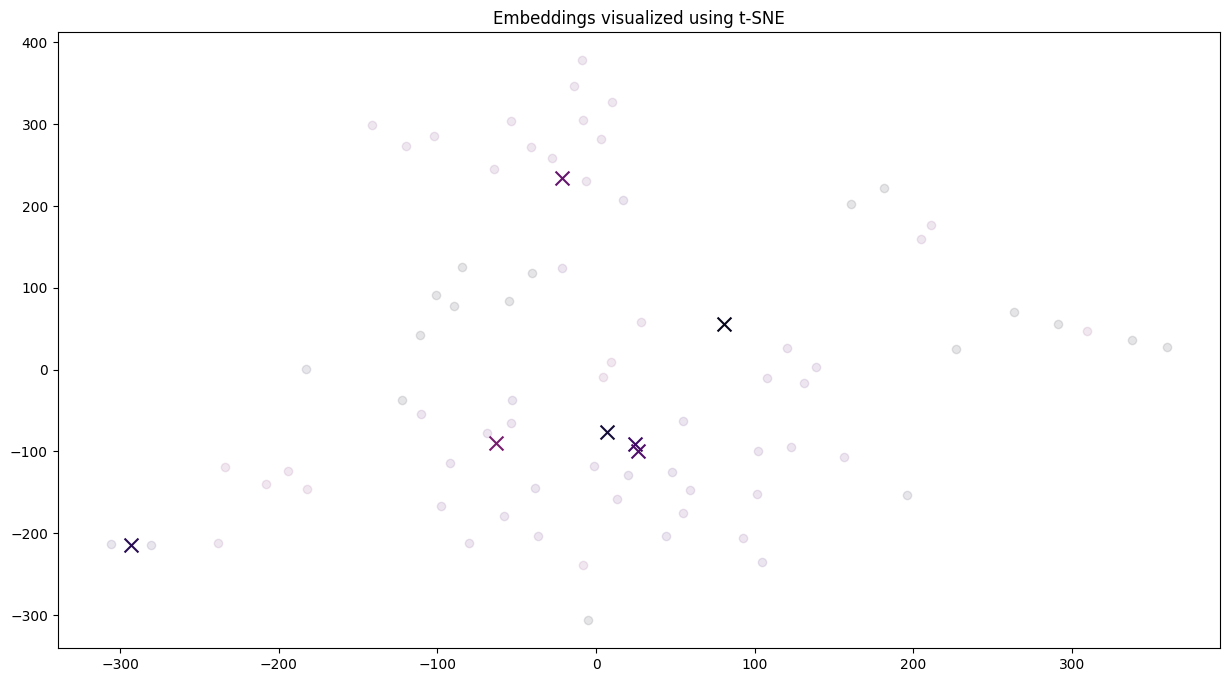

In [22]:
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 8) 

tsne = TSNE(n_components=2, perplexity=5, random_state=42, init='random', learning_rate=200)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x,y in vis_dims2]
y = [y for x,y in vis_dims2]

palette = sns.color_palette("inferno", 20).as_hex() 

for category, color in enumerate(palette):
    xs = np.array(x)[df_embeddings["Cluster"]==category]
    ys = np.array(y)[df_embeddings["Cluster"]==category]
    plt.scatter(xs, ys, color=color, alpha=0.1)

    avg_x = xs.mean()
    avg_y = ys.mean()
    
    plt.scatter(avg_x, avg_y, marker='x', color=color, s=100)
plt.title("Embeddings visualized using t-SNE")

In [23]:
df_marked_tmp=df_marked
# df_marked_tmp.set_index( ['Student'], inplace = True)
df_final = pd.merge(df_marked_tmp,df_embeddings[["n_tokens","ada_v2","Cluster"]], how='left', left_index=True, right_index=True)

cols = ['Marks', 'Comments', 'Answers','CopyFromInternet','GenerativeAI','ChatGptTokens','Error','Cluster','Note']

df_final= df_final[cols]
df_final.to_excel("data/final.xlsx", index=False)
df_final.head(5)


Marks                                           Comments   
0     50  Great job! Your answer is well-structured and ...  \
1     50  Great job! Your answer shows good understandin...   
2     45  Your answer displays a good understanding of y...   
3     50  Overall, the student has provided a decent ans...   
4     60  Great job! Your answer is thorough and demonst...   

                                             Answers  CopyFromInternet   
0  \n\nITP4121 Workplace Reflective Journal\n\nLe...               0.0  \
1  \n\nJob Responsibility and Roles\n\nWorkplace ...               0.1   
2  \n\nITP4121 Cloud and Data Centre Workplace Pr...               0.2   
3  \n\nChan HiuPo 210151024\n\n\n\nTable of conte...               0.0   
4  \n\nIP Siu Fung Ernest (210123688)\n\nIT114115...               0.0   

   GenerativeAI  ChatGptTokens  Error  Cluster Note  
0           0.0           1432  False      NaN    0  
1           0.2           2037  False      NaN  0.2  
2           0.0           2363  False      NaN    0  
3           0.0           1816  False      NaN    0  
4           0.0           2084  False      NaN    0

In [24]:
df_Answers

Answers   
Student                                                                 
LEUNG Chun Wa       ITP4121 Workplace Reflective Journal Leung Chu...  \
CHEUNG Chi Him      Job Responsibility and Roles Workplace experie...   
NG Man Chun         ITP4121 Cloud and Data Centre Workplace Practi...   
CHAN Hiu Po         Chan HiuPo 210151024 Table of contents Job Res...   
IP Siu Fung Ernest  IP Siu Fung Ernest (210123688) IT114115/2B ITP...   
...                                                               ...   
LO Fu Hon           Job Responsibility and Roles I am responsible ...   
NAWAZ Raheem        As an intern at GTI, my role as a System Admin...   
CHONG Ka Fai        I will focus on the following items for this r...   
ZENG Haoxuan        ITP4121 -Assignment -EA3 IT114115 -2B name : Z...   
LEE Kai                                                    Do nothing   

                    n_tokens   
Student                        
LEUNG Chun Wa            655  \
CHEUNG Chi Him          1237   
NG Man Chun             1532   
CHAN Hiu Po              986   
IP Siu Fung Ernest      1307   
...                      ...   
LO Fu Hon               3264   
NAWAZ Raheem             860   
CHONG Ka Fai            1128   
ZENG Haoxuan            1082   
LEE Kai                    2   

                                                               ada_v2  Cluster  
Student                                                                         
LEUNG Chun Wa       [0.010281223803758621, -0.010676655918359756, ...        4  
CHEUNG Chi Him      [-0.012838901951909065, -0.027127781882882118,...        4  
NG Man Chun         [0.007017713040113449, -0.02948104590177536, 0...        4  
CHAN Hiu Po         [0.002446548081934452, -0.003825077321380377, ...        3  
IP Siu Fung Ernest  [0.002623006235808134, -0.015880554914474487, ...        5  
...                                                               ...      ...  
LO Fu Hon           [-0.007378511596471071, -0.02641216665506363, ...        0  
NAWAZ Raheem        [-0.01746942475438118, -0.03845672309398651, 0...        0  
CHONG Ka Fai        [0.0008320792112499475, -0.008383403532207012,...        4  
ZENG Haoxuan        [-0.00724449660629034, -0.014353200793266296, ...        5  
LEE Kai             [-0.023509101942181587, -0.010022647678852081,...        2  

[74 rows x 4 columns]

### Reduce the embedding dimensionality

In [26]:
from sklearn.decomposition import PCA

pca_df = df_Answers
matrix = pca_df["ada_v2"].to_list()
pca = PCA(n_components=3)
vis_dims = pca.fit_transform(matrix)
pca_df["embed_vis"] = vis_dims.tolist()
pca_df

Answers   
Student                                                                 
LEUNG Chun Wa       ITP4121 Workplace Reflective Journal Leung Chu...  \
CHEUNG Chi Him      Job Responsibility and Roles Workplace experie...   
NG Man Chun         ITP4121 Cloud and Data Centre Workplace Practi...   
CHAN Hiu Po         Chan HiuPo 210151024 Table of contents Job Res...   
IP Siu Fung Ernest  IP Siu Fung Ernest (210123688) IT114115/2B ITP...   
...                                                               ...   
LO Fu Hon           Job Responsibility and Roles I am responsible ...   
NAWAZ Raheem        As an intern at GTI, my role as a System Admin...   
CHONG Ka Fai        I will focus on the following items for this r...   
ZENG Haoxuan        ITP4121 -Assignment -EA3 IT114115 -2B name : Z...   
LEE Kai                                                    Do nothing   

                    n_tokens   
Student                        
LEUNG Chun Wa            655  \
CHEUNG Chi Him          1237   
NG Man Chun             1532   
CHAN Hiu Po              986   
IP Siu Fung Ernest      1307   
...                      ...   
LO Fu Hon               3264   
NAWAZ Raheem             860   
CHONG Ka Fai            1128   
ZENG Haoxuan            1082   
LEE Kai                    2   

                                                               ada_v2   
Student                                                                 
LEUNG Chun Wa       [0.010281223803758621, -0.010676655918359756, ...  \
CHEUNG Chi Him      [-0.012838901951909065, -0.027127781882882118,...   
NG Man Chun         [0.007017713040113449, -0.02948104590177536, 0...   
CHAN Hiu Po         [0.002446548081934452, -0.003825077321380377, ...   
IP Siu Fung Ernest  [0.002623006235808134, -0.015880554914474487, ...   
...                                                               ...   
LO Fu Hon           [-0.007378511596471071, -0.02641216665506363, ...   
NAWAZ Raheem        [-0.01746942475438118, -0.03845672309398651, 0...   
CHONG Ka Fai        [0.0008320792112499475, -0.008383403532207012,...   
ZENG Haoxuan        [-0.00724449660629034, -0.014353200793266296, ...   
LEE Kai             [-0.023509101942181587, -0.010022647678852081,...   

                    Cluster                                          embed_vis  
Student                                                                         
LEUNG Chun Wa             4  [-0.13635353327975386, 0.008360397103922118, -...  
CHEUNG Chi Him            4  [-0.09599362012164737, -0.023157071115988765, ...  
NG Man Chun               4  [-0.1361373448764206, -0.031665256079634094, -...  
CHAN Hiu Po               3  [-0.05728237444129135, 0.006165173257644549, -...  
IP Siu Fung Ernest        5  [-0.09556236754570296, -0.013026931821833777, ...  
...                     ...                                                ...  
LO Fu Hon                 0  [0.11993249002908835, -0.19304509395338715, -0...  
NAWAZ Raheem              0  [0.1259357791289315, 0.07458386078343195, -0.0...  
CHONG Ka Fai              4  [-0.08680060904502472, -0.03994868435062993, -...  
ZENG Haoxuan              5  [0.04941818608470337, 0.04830606333138089, -0....  
LEE Kai                   2  [0.25445178016660813, 0.4309930288055453, 0.01...  

[74 rows x 5 columns]

Text(0.5, 0, 'z')

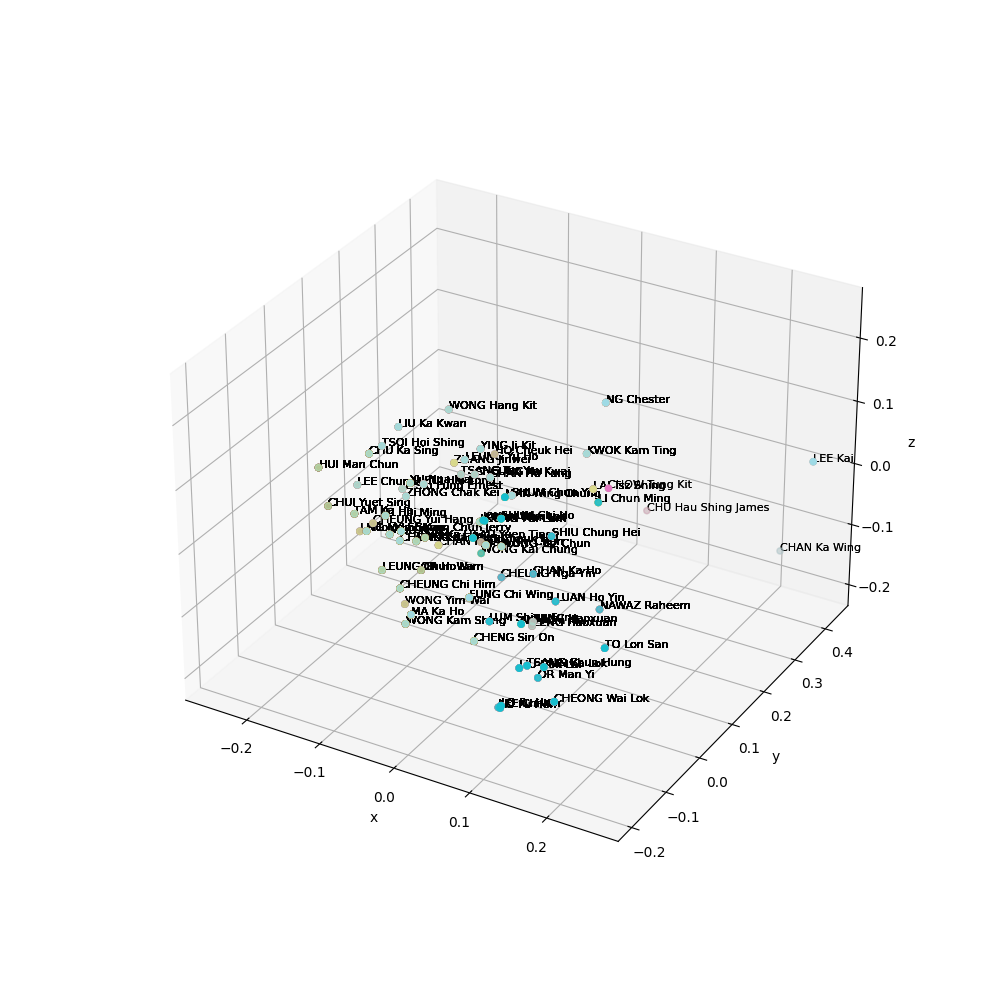

In [37]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
cmap = plt.get_cmap("tab20")

clusters = pca_df["Cluster"].to_list()

# Plot each sample category individually such that we can set label name.
for i, clusterId in enumerate(clusters):
    sub_matrix = np.array(pca_df[pca_df["Cluster"] == clusterId]["embed_vis"].to_list())
    
    x=sub_matrix[:, 0]
    y=sub_matrix[:, 1]
    z=sub_matrix[:, 2]
    colors = [cmap(i/len(clusters))] * len(sub_matrix)
    ax.scatter(x, y, zs=z, zdir='z', c=colors, label=clusterId)

    students = pca_df[pca_df["Cluster"] == clusterId].index.values.tolist()
    for i, txt in enumerate(students):
        ax.text(x[i], y[i], z[i], txt, size=8, zorder=1, color='k')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.legend(bbox_to_anchor=(1.1, 1))